In [14]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import pandas_profiling

C:\Users\arpan\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\arpan\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\arpan\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\arpan\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\arpan\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\arpan\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\arp

In [220]:
udf = pd.read_csv('users_large.csv')
udf.head()

,gender,dob,location,partner,userId
0,male,1954-01-16 19:00:00,"37.8425606899999991,-85.4842177400000054",NaN,2f557d23b7b24a5c80586b7119b2148c
1,male,1980-07-27 20:00:00,"37.833993424197061,-122.190195647319996",b6599e82c7db42538d376e21c7c01171,75eba68431094c55ae1fba56f8f5b861
2,female,1975-02-11 19:00:00,"57.7414159200000014,12.0753449899999996",c361c367944749f78b09beedce4816db,7fa6c0917f99407eaeda91908fc92235
3,male,1979-07-09 20:00:00,"-33.4293767040255361,-70.5886206036256141",770197a06a4f4b7f97f9a4d1d9a0b405,474db47f079b4b05aefc5989bcd22f62
4,female,1989-08-19 20:00:00,"27.9966092406665794,-82.4493318922714025",af125927d58542b49ab7d47c2b656ea5,7f4bc30054ec4cc58b0311dfc8ff01ab


In [4]:
len(udf)

8967

In [227]:
usplit_df.dtypes.astype(str).to_dict()

{'dob': 'object', 'b_time': 'object'}

In [224]:
(pd.to_datetime('today').year-pd.to_datetime('1954-01-16').year)

64

In [230]:
# Splitting the dob column to get year of birth

usplit_df = pd.DataFrame(udf.dob.str.split(' ',1).tolist(), columns = ['dob','b_time'])
usplit_df['dob'] = usplit_df['dob'].str[:4]

# subtracting all the years from 2018 to get the age of all users
usplit_df['dob'] = pd.to_numeric(usplit_df['dob'])
usplit_df['age'] = 2018 - usplit_df['dob']
del usplit_df['b_time']

usplit_df.head()

,dob,age
0,1954,64
1,1980,38
2,1975,43
3,1979,39
4,1989,29


In [231]:
del usplit_df['dob']

In [233]:
final_udf = pd.concat([udf, usplit_df], axis=1)
final_udf.head()

,gender,dob,location,partner,userId,age
0,male,1954-01-16 19:00:00,"37.8425606899999991,-85.4842177400000054",NaN,2f557d23b7b24a5c80586b7119b2148c,64
1,male,1980-07-27 20:00:00,"37.833993424197061,-122.190195647319996",b6599e82c7db42538d376e21c7c01171,75eba68431094c55ae1fba56f8f5b861,38
2,female,1975-02-11 19:00:00,"57.7414159200000014,12.0753449899999996",c361c367944749f78b09beedce4816db,7fa6c0917f99407eaeda91908fc92235,43
3,male,1979-07-09 20:00:00,"-33.4293767040255361,-70.5886206036256141",770197a06a4f4b7f97f9a4d1d9a0b405,474db47f079b4b05aefc5989bcd22f62,39
4,female,1989-08-19 20:00:00,"27.9966092406665794,-82.4493318922714025",af125927d58542b49ab7d47c2b656ea5,7f4bc30054ec4cc58b0311dfc8ff01ab,29


In [102]:
idf = pd.read_csv('intervals_large.csv')

C:\Users\arpan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [67]:
idf.head()

,end_ts,score,start_ts,user_id,session_duration_seconds,sleep_duration_seconds,presence_duration_seconds,tnt_count,avg_bedtemp_c,avg_heart_rate,avg_resp_rate,avg_roomtemp_c,deep_duration,light_duration,rem_duration,id
0,2017-12-13 09:05:00,92,2017-12-12 23:26:00,0335d5af35b34bd7a8966f8481c1aba6,"34,020","26,700","34,020",8.0,35.846226,NaN,NaN,NaN,6780.0,19920.0,0.0,"73,556,139"
1,2017-12-13 10:58:00,81,2017-12-13 00:43:00,82b2052ba5dd4779b233af048805272d,"36,060","34,140","35,400",13.0,33.785819,NaN,NaN,NaN,8880.0,25260.0,0.0,"73,556,164"
2,2017-12-12 12:22:00,64,2017-12-12 03:51:00,9cb1ef1ae14948619830f0e956a3379e,"29,940","23,340","27,480",20.0,31.817300,NaN,NaN,NaN,6000.0,17340.0,0.0,"72,827,151"
3,2017-10-05 11:36:00,62,2017-10-05 00:52:00,4f1e86e2192741a08a2716fa2771512a,"37,980","18,000","37,260",6.0,NaN,NaN,NaN,NaN,4440.0,13560.0,0.0,"24,709,302"
4,2017-10-10 05:44:00,12,2017-10-10 04:54:00,26e2a932e4eb49c687706bbe9fd3e69f,"2,880","1,800","2,880",0.0,NaN,NaN,NaN,NaN,0.0,1800.0,0.0,"28,086,254"


In [7]:
len(idf)

1042308

In [16]:
pandas_profiling.ProfileReport(idf)

Number of variables,16
Number of observations,1042308
Total Missing (%),21.9%
Total size in memory,127.2 MiB
Average record size in memory,128.0 B
Numeric,9
Categorical,6
Boolean,0
Date,0
Text (Unique),1
Rejected,0


In [38]:
# data types of all columns in idf dataframe
idf.dtypes.astype(str).to_dict()

{'end_ts': 'datetime64[ns]',
 'score': 'int64',
 'start_ts': 'datetime64[ns]',
 'user_id': 'object',
 'session_duration_seconds': 'object',
 'sleep_duration_seconds': 'object',
 'presence_duration_seconds': 'object',
 'tnt_count': 'float64',
 'avg_bedtemp_c': 'float64',
 'avg_heart_rate': 'float64',
 'avg_resp_rate': 'float64',
 'avg_roomtemp_c': 'float64',
 'deep_duration': 'float64',
 'light_duration': 'float64',
 'rem_duration': 'float64',
 'id': 'object'}

In [100]:
# converting 'end_ts' and 'start_ts' to pandas datetime object

idf['end_ts'] = pd.to_datetime(idf['end_ts'])
idf['start_ts'] = pd.to_datetime(idf['start_ts'])

In [101]:
# Converting the UTC times to the local timezone (New York in this case, which is 4 hours behind UTC)

idf['end_ts'] = idf['end_ts'] - pd.to_timedelta(4, unit='h')
idf['start_ts'] = idf['start_ts'] - pd.to_timedelta(4, unit='h')

In [75]:
idf.head()

,end_ts,score,start_ts,user_id,session_duration_seconds,sleep_duration_seconds,presence_duration_seconds,tnt_count,avg_bedtemp_c,avg_heart_rate,avg_resp_rate,avg_roomtemp_c,deep_duration,light_duration,rem_duration,id
0,2017-12-13 05:05:00,92,2017-12-12 19:26:00,0335d5af35b34bd7a8966f8481c1aba6,"34,020","26,700","34,020",8.0,35.846226,NaN,NaN,NaN,6780.0,19920.0,0.0,"73,556,139"
1,2017-12-13 06:58:00,81,2017-12-12 20:43:00,82b2052ba5dd4779b233af048805272d,"36,060","34,140","35,400",13.0,33.785819,NaN,NaN,NaN,8880.0,25260.0,0.0,"73,556,164"
2,2017-12-12 08:22:00,64,2017-12-11 23:51:00,9cb1ef1ae14948619830f0e956a3379e,"29,940","23,340","27,480",20.0,31.817300,NaN,NaN,NaN,6000.0,17340.0,0.0,"72,827,151"
3,2017-10-05 07:36:00,62,2017-10-04 20:52:00,4f1e86e2192741a08a2716fa2771512a,"37,980","18,000","37,260",6.0,NaN,NaN,NaN,NaN,4440.0,13560.0,0.0,"24,709,302"
4,2017-10-10 01:44:00,12,2017-10-10 00:54:00,26e2a932e4eb49c687706bbe9fd3e69f,"2,880","1,800","2,880",0.0,NaN,NaN,NaN,NaN,0.0,1800.0,0.0,"28,086,254"


In [76]:
idf['user_id'].nunique()

6513

In [77]:
udf['userId'].nunique()

8950

In [122]:
# Splitting the start_ts column to get the start dates and times alone

ndf = pd.DataFrame(idf.start_ts.str.split(' ',1).tolist(), columns = ['start_date','start_time'])
ndf.head()

,start_date,start_time
0,2017-12-12,23:26:00
1,2017-12-13,00:43:00
2,2017-12-12,03:51:00
3,2017-10-05,00:52:00
4,2017-10-10,04:54:00


In [123]:
# Splitting the end_ts column to get the end dates and times alone

edf = pd.DataFrame(idf.end_ts.str.split(' ',1).tolist(), columns = ['end_date','end_time'])
edf.head()

,end_date,end_time
0,2017-12-13,09:05:00
1,2017-12-13,10:58:00
2,2017-12-12,12:22:00
3,2017-10-05,11:36:00
4,2017-10-10,05:44:00


In [106]:
ndf.dtypes.astype(str).to_dict()

{'start_date': 'object', 'start_time': 'object'}

In [124]:
# Extracting only the hour and month of goint to bed(start)

ndf['start_hour'] = ndf['start_time'].str[:2]
ndf['start_month'] = ndf['start_date'].str[5:7]
ndf.head()

,start_date,start_time,start_hour,start_month
0,2017-12-12,23:26:00,23,12
1,2017-12-13,00:43:00,00,12
2,2017-12-12,03:51:00,03,12
3,2017-10-05,00:52:00,00,10
4,2017-10-10,04:54:00,04,10


In [125]:
ndf['end_hour'] = edf['end_time'].str[:2]
ndf['end_month'] = edf['end_date'].str[5:7]
ndf.head()

,start_date,start_time,start_hour,start_month,end_hour,end_month
0,2017-12-12,23:26:00,23,12,09,12
1,2017-12-13,00:43:00,00,12,10,12
2,2017-12-12,03:51:00,03,12,12,12
3,2017-10-05,00:52:00,00,10,11,10
4,2017-10-10,04:54:00,04,10,05,10


In [127]:
del ndf['start_date']
del ndf['start_time']
ndf.head()

,start_hour,start_month,end_hour,end_month
0,23,12,09,12
1,00,12,10,12
2,03,12,12,12
3,00,10,11,10
4,04,10,05,10


In [197]:
result = pd.concat([idf, ndf], axis=1)
result.head()

,end_ts,score,start_ts,user_id,session_duration_seconds,sleep_duration_seconds,presence_duration_seconds,tnt_count,avg_bedtemp_c,avg_heart_rate,avg_resp_rate,avg_roomtemp_c,deep_duration,light_duration,rem_duration,id,start_hour,start_month,end_hour,end_month
0,2017-12-13 09:05:00,92,2017-12-12 23:26:00,0335d5af35b34bd7a8966f8481c1aba6,"34,020","26,700","34,020",8.0,35.846226,NaN,NaN,NaN,6780.0,19920.0,0.0,"73,556,139",23,12,09,12
1,2017-12-13 10:58:00,81,2017-12-13 00:43:00,82b2052ba5dd4779b233af048805272d,"36,060","34,140","35,400",13.0,33.785819,NaN,NaN,NaN,8880.0,25260.0,0.0,"73,556,164",00,12,10,12
2,2017-12-12 12:22:00,64,2017-12-12 03:51:00,9cb1ef1ae14948619830f0e956a3379e,"29,940","23,340","27,480",20.0,31.817300,NaN,NaN,NaN,6000.0,17340.0,0.0,"72,827,151",03,12,12,12
3,2017-10-05 11:36:00,62,2017-10-05 00:52:00,4f1e86e2192741a08a2716fa2771512a,"37,980","18,000","37,260",6.0,NaN,NaN,NaN,NaN,4440.0,13560.0,0.0,"24,709,302",00,10,11,10
4,2017-10-10 05:44:00,12,2017-10-10 04:54:00,26e2a932e4eb49c687706bbe9fd3e69f,"2,880","1,800","2,880",0.0,NaN,NaN,NaN,NaN,0.0,1800.0,0.0,"28,086,254",04,10,05,10


Text(0.5,0,'Month')

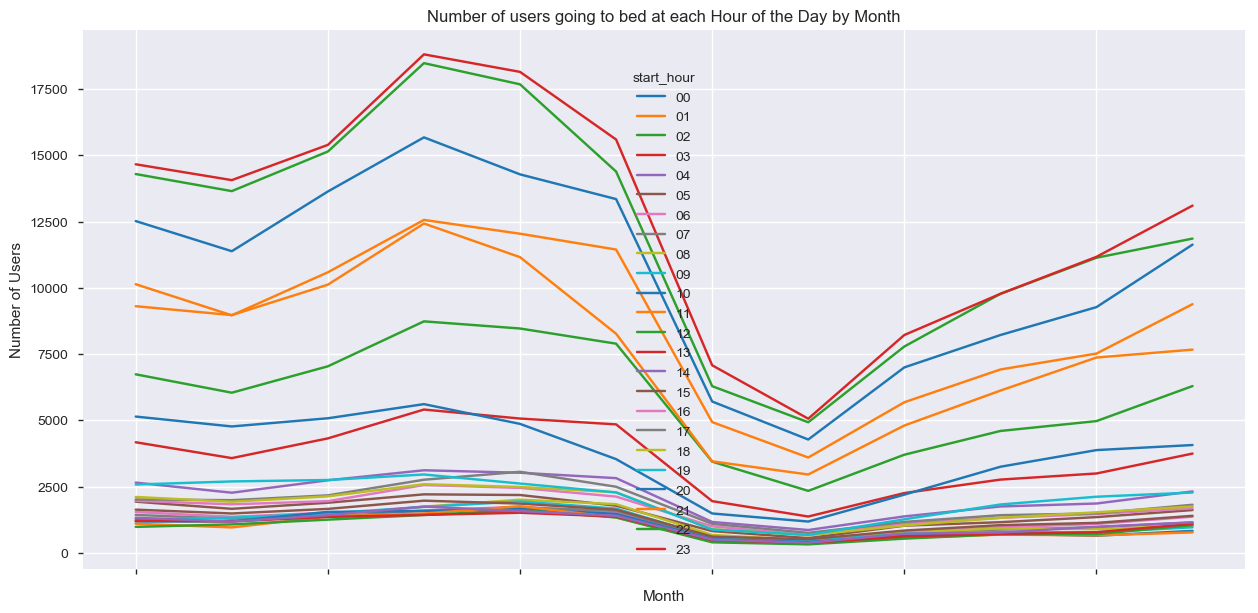

In [200]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
result_new.plot(ax=ax)
plt.title('Number of users going to bed at each Hour of the Day by Month')
plt.ylabel('Number of Users')
plt.xlabel('Month')
# .groupby(['start_month','start_hour']).count()['sleep_duration_seconds'].unstack()

In [167]:
# Substituting the month numbers by their names (abbreviations) in dataframe "result"

look_up = {'01': 'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr', '05': 'May',
            '06': 'Jun', '07': 'Jul', '08': 'Aug', '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}

result['start_month'] = result['start_month'].apply(lambda x: look_up[x])
result['end_month'] = result['end_month'].apply(lambda x: look_up[x])
result.head()

,end_ts,score,start_ts,user_id,session_duration_seconds,sleep_duration_seconds,presence_duration_seconds,tnt_count,avg_bedtemp_c,avg_heart_rate,avg_resp_rate,avg_roomtemp_c,deep_duration,light_duration,rem_duration,id,start_hour,start_month,end_hour,end_month
0,2017-12-13 09:05:00,92,2017-12-12 23:26:00,0335d5af35b34bd7a8966f8481c1aba6,"34,020","26,700","34,020",8.0,35.846226,NaN,NaN,NaN,6780.0,19920.0,0.0,"73,556,139",23,Dec,09,Dec
1,2017-12-13 10:58:00,81,2017-12-13 00:43:00,82b2052ba5dd4779b233af048805272d,"36,060","34,140","35,400",13.0,33.785819,NaN,NaN,NaN,8880.0,25260.0,0.0,"73,556,164",00,Dec,10,Dec
2,2017-12-12 12:22:00,64,2017-12-12 03:51:00,9cb1ef1ae14948619830f0e956a3379e,"29,940","23,340","27,480",20.0,31.817300,NaN,NaN,NaN,6000.0,17340.0,0.0,"72,827,151",03,Dec,12,Dec
3,2017-10-05 11:36:00,62,2017-10-05 00:52:00,4f1e86e2192741a08a2716fa2771512a,"37,980","18,000","37,260",6.0,NaN,NaN,NaN,NaN,4440.0,13560.0,0.0,"24,709,302",00,Oct,11,Oct
4,2017-10-10 05:44:00,12,2017-10-10 04:54:00,26e2a932e4eb49c687706bbe9fd3e69f,"2,880","1,800","2,880",0.0,NaN,NaN,NaN,NaN,0.0,1800.0,0.0,"28,086,254",04,Oct,05,Oct


In [314]:
# Removing "," from the following columns to use them as numeric types

result['sleep_duration_seconds'] = result.sleep_duration_seconds.str.replace(",", "")
result['session_duration_seconds'] = result.session_duration_seconds.str.replace(",", "")
result['presence_duration_seconds'] = result.presence_duration_seconds.str.replace(",", "")
result.head()

,end_ts,score,start_ts,user_id,session_duration_seconds,sleep_duration_seconds,presence_duration_seconds,tnt_count,avg_bedtemp_c,avg_heart_rate,avg_resp_rate,avg_roomtemp_c,deep_duration,light_duration,rem_duration,id,start_hour,start_month,end_hour,end_month
0,2017-12-13 09:05:00,92,2017-12-12 23:26:00,0335d5af35b34bd7a8966f8481c1aba6,34020,26700,34020,8.0,35.846226,NaN,NaN,NaN,6780.0,19920.0,0.0,"73,556,139",23,12,09,12
1,2017-12-13 10:58:00,81,2017-12-13 00:43:00,82b2052ba5dd4779b233af048805272d,36060,34140,35400,13.0,33.785819,NaN,NaN,NaN,8880.0,25260.0,0.0,"73,556,164",00,12,10,12
2,2017-12-12 12:22:00,64,2017-12-12 03:51:00,9cb1ef1ae14948619830f0e956a3379e,29940,23340,27480,20.0,31.817300,NaN,NaN,NaN,6000.0,17340.0,0.0,"72,827,151",03,12,12,12
3,2017-10-05 11:36:00,62,2017-10-05 00:52:00,4f1e86e2192741a08a2716fa2771512a,37980,18000,37260,6.0,NaN,NaN,NaN,NaN,4440.0,13560.0,0.0,"24,709,302",00,10,11,10
4,2017-10-10 05:44:00,12,2017-10-10 04:54:00,26e2a932e4eb49c687706bbe9fd3e69f,2880,1800,2880,0.0,NaN,NaN,NaN,NaN,0.0,1800.0,0.0,"28,086,254",04,10,05,10


In [187]:
result['tnt_count'].isnull().any().any()

False

In [192]:
# pd.to_numeric(result['sleep_duration_seconds'])
# # result['sleep_duration_seconds'].astype(str).astype(float)

result_new = result.groupby(['start_month','start_hour']).count()['user_id'].unstack()
result_new.head()

start_hour,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
start_month,,,,,,,,,,,,,,,,,,,,,
Apr,15674,12560,8734,5407,3116,2208,1596,1588,1743,1733,...,1746,1969,2558,2759,2590,2957,5611,12425,18475,18806
Aug,4276,3597,2339,1371,862,557,496,422,480,459,...,382,515,673,755,665,678,1182,2957,4927,5061
Dec,11629,9383,6293,3746,2318,1616,1365,1150,1031,965,...,1149,1398,1682,1815,1750,2277,4068,7667,11856,13100
Feb,11380,8962,6042,3575,2269,1662,1362,1285,1199,1327,...,1180,1486,1831,1988,1929,2695,4769,8971,13647,14062
Jan,12517,10134,6736,4173,2651,1931,1541,1432,1305,1266,...,1324,1631,1963,2016,2109,2578,5142,9305,14291,14659


In [194]:
# Sorting the index in order of months

result_new.index = pd.CategoricalIndex(result_new.index, 
                               categories=['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec'], 
                               sorted=True)
result_new = result_new.sort_index()

In [201]:
result_new.head()

start_hour,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
start_month,,,,,,,,,,,,,,,,,,,,,
Jan,12517,10134,6736,4173,2651,1931,1541,1432,1305,1266,...,1324,1631,1963,2016,2109,2578,5142,9305,14291,14659
Feb,11380,8962,6042,3575,2269,1662,1362,1285,1199,1327,...,1180,1486,1831,1988,1929,2695,4769,8971,13647,14062
Mar,13633,10585,7038,4319,2738,1891,1516,1410,1399,1491,...,1423,1659,1950,2170,2133,2749,5078,10118,15141,15391
Apr,15674,12560,8734,5407,3116,2208,1596,1588,1743,1733,...,1746,1969,2558,2759,2590,2957,5611,12425,18475,18806
May,14279,12040,8464,5067,3023,2183,1740,1709,2007,1941,...,1576,1859,2451,3059,2486,2615,4866,11155,17676,18145


Text(0.5,0,'Month')

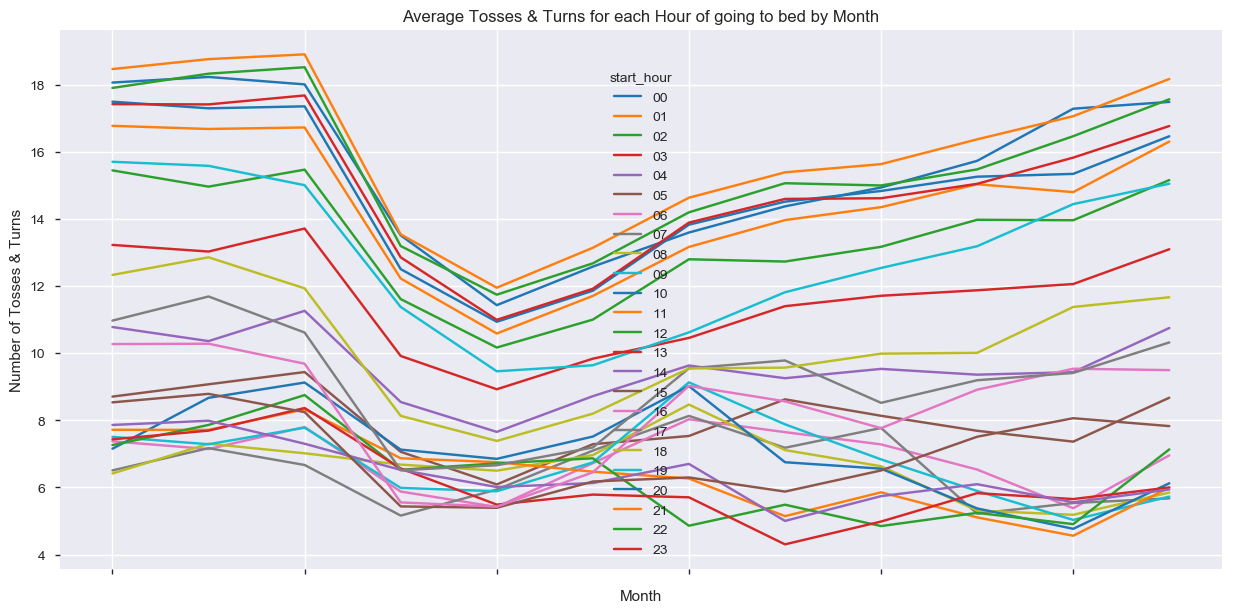

In [199]:
fig, ax = plt.subplots(figsize=(15,7))
result.groupby(['start_month','start_hour']).mean()['tnt_count'].unstack().plot(ax=ax)
plt.title('Average Tosses & Turns for each Hour of going to bed by Month')
plt.ylabel('Number of Tosses & Turns')
plt.xlabel('Month')

## The following visualizations use the Seaborn package in Python

In [202]:
import matplotlib as mpl
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Categorical Scatterplots

### The plot below shows the deep-sleep duration of users for every month of the year. What is strikingly clear is that in the month of August, users typically get a very longer period of deep sleep.

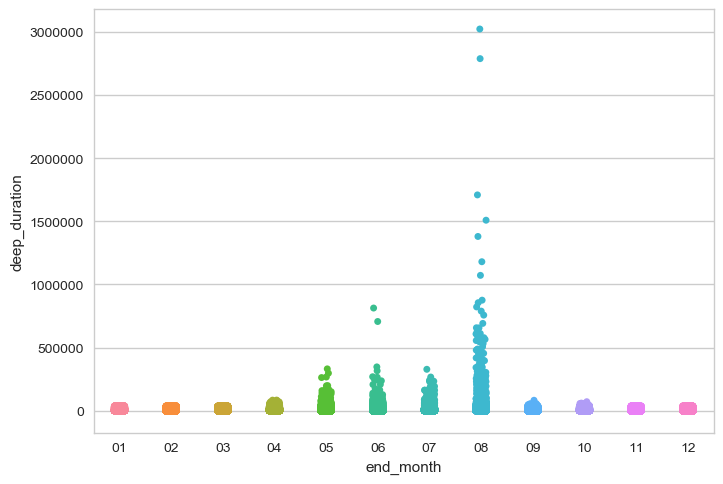

In [203]:
sns.stripplot(x="end_month", y="deep_duration", data=result, jitter=True).set_title("Duration of Deep Sleep by Month")

## Swarmplots

In [315]:
new_df = pd.merge(final_udf, result, how='left', left_on=['userId'], right_on=['user_id'])
new_df.head()

,gender,dob,location,partner,userId,age,end_ts,score,start_ts,user_id,...,avg_resp_rate,avg_roomtemp_c,deep_duration,light_duration,rem_duration,id,start_hour,start_month,end_hour,end_month
0,male,1954-01-16 19:00:00,"37.8425606899999991,-85.4842177400000054",NaN,2f557d23b7b24a5c80586b7119b2148c,64,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,male,1980-07-27 20:00:00,"37.833993424197061,-122.190195647319996",b6599e82c7db42538d376e21c7c01171,75eba68431094c55ae1fba56f8f5b861,38,2017-11-16 08:51:00,19.0,2017-11-16 04:54:00,75eba68431094c55ae1fba56f8f5b861,...,NaN,NaN,0.0,2760.0,0.0,"53,267,017",04,11,08,11
2,male,1980-07-27 20:00:00,"37.833993424197061,-122.190195647319996",b6599e82c7db42538d376e21c7c01171,75eba68431094c55ae1fba56f8f5b861,38,2017-11-07 08:27:00,49.0,2017-11-06 23:34:00,75eba68431094c55ae1fba56f8f5b861,...,NaN,NaN,1200.0,12360.0,0.0,"46,898,272",23,11,08,11
3,male,1980-07-27 20:00:00,"37.833993424197061,-122.190195647319996",b6599e82c7db42538d376e21c7c01171,75eba68431094c55ae1fba56f8f5b861,38,2017-11-04 11:56:00,68.0,2017-11-03 23:00:00,75eba68431094c55ae1fba56f8f5b861,...,NaN,NaN,3600.0,17160.0,0.0,"44,785,269",23,11,11,11
4,male,1980-07-27 20:00:00,"37.833993424197061,-122.190195647319996",b6599e82c7db42538d376e21c7c01171,75eba68431094c55ae1fba56f8f5b861,38,2017-11-04 17:08:00,16.0,2017-11-04 14:20:00,75eba68431094c55ae1fba56f8f5b861,...,NaN,NaN,0.0,2340.0,0.0,"44,844,084",14,11,17,11


In [235]:
len(new_df)

1047008

In [349]:
avnew_df = new_df.dropna()
len(avnew_df)

8131

In [347]:
arpdf = new_df.groupby(['user_id','start_hour']).count().unstack()
arpdf.head()

gender                                     \
start_hour                           00    01    02    03    04    05   06   
user_id                                                                      
000082c978564cfb8975ad180295d080   42.0   2.0   NaN   NaN   1.0   1.0  NaN   
0003fd87352c4bb7b31fe469b10dbc4b    1.0   NaN   NaN   NaN   NaN   NaN  NaN   
000533dffabd4be6862fef16692d01bf    1.0   NaN   NaN   NaN   NaN   NaN  NaN   
0006f2b9e79346888424372e72976ffe   44.0  29.0  34.0  21.0  17.0  12.0  9.0   
001fd942f6664069904711fe18b32d1f   19.0   9.0   7.0   2.0   4.0   NaN  2.0   

                                                 ...   end_month            \
start_hour                         07   08   09  ...          14   15   16   
user_id                                          ...                         
000082c978564cfb8975ad180295d080  NaN  NaN  1.0  ...         5.0  3.0  6.0   
0003fd87352c4bb7b31fe469b10dbc4b  NaN  NaN  NaN  ...         2.0  6.0  2.0   
000533dffabd4be6862fef16692d01bf  NaN  NaN  NaN  ...         NaN  NaN  NaN   
0006f2b9e79346888424372e72976ffe  5.0  6.0  1.0  ...         2.0  2.0  2.0   
001fd942f6664069904711fe18b32d1f  NaN  NaN  NaN  ...         NaN  NaN  NaN   

                                                                           
start_hour                         17   18   19    20    21     22     23  
user_id                                                                    
000082c978564cfb8975ad180295d080  2.0  6.0  2.0   1.0  10.0   80.0  129.0  
0003fd87352c4bb7b31fe469b10dbc4b  1.0  1.0  NaN   NaN   NaN   26.0   26.0  
000533dffabd4be6862fef16692d01bf  NaN  1.0  1.0   7.0  45.0   23.0    7.0  
0006f2b9e79346888424372e72976ffe  2.0  3.0  5.0  12.0  38.0  101.0   69.0  
001fd942f6664069904711fe18b32d1f  NaN  NaN  NaN   1.0   5.0   20.0   25.0  

[5 rows x 576 columns]

In [316]:
# Grouping by users to get average respiration rate of each user

n1df = new_df.groupby('user_id', as_index=False)['tnt_count'].mean()
n1df.head()

,user_id,tnt_count
0,000082c978564cfb8975ad180295d080,19.448161
1,0003fd87352c4bb7b31fe469b10dbc4b,15.308824
2,000533dffabd4be6862fef16692d01bf,20.423529
3,0006f2b9e79346888424372e72976ffe,6.452153
4,001fd942f6664069904711fe18b32d1f,19.617021


In [318]:
# Grouping by users to get deep sleep duration of each user

new_df['sleep_duration_seconds'] = pd.to_numeric(new_df['sleep_duration_seconds'])

n2df = new_df.groupby('user_id', as_index=False)['sleep_duration_seconds'].mean()
n2df.head()

,user_id,sleep_duration_seconds
0,000082c978564cfb8975ad180295d080,23229.030100
1,0003fd87352c4bb7b31fe469b10dbc4b,16401.176471
2,000533dffabd4be6862fef16692d01bf,24271.764706
3,0006f2b9e79346888424372e72976ffe,15080.967742
4,001fd942f6664069904711fe18b32d1f,28631.489362


In [319]:
del n2df['user_id']

res_df = pd.concat([n1df, n2df], axis=1)
res_df.head()

,user_id,tnt_count,sleep_duration_seconds
0,000082c978564cfb8975ad180295d080,19.448161,23229.030100
1,0003fd87352c4bb7b31fe469b10dbc4b,15.308824,16401.176471
2,000533dffabd4be6862fef16692d01bf,20.423529,24271.764706
3,0006f2b9e79346888424372e72976ffe,6.452153,15080.967742
4,001fd942f6664069904711fe18b32d1f,19.617021,28631.489362


In [321]:
r4df = res_df[(res_df["tnt_count"] < 40) & (res_df["sleep_duration_seconds"] < 50000)]
len(r4df)

6321

In [380]:
import numpy as np
from sklearn.cluster import KMeans

### We store feature data from our
### dataframe `r4df`, in the `f1` and `f2` arrays. We combine this into
### a feature matrix `X` before entering it into the algorithm.
f1 = avnew_df['avg_roomtemp_c'].values
f2 = avnew_df['sleep_duration_seconds'].values
f3 = avnew_df['avg_resp_rate'].values
f4 = avnew_df['deep_duration'].values
f5 = avnew_df['light_duration'].values
f6 = avnew_df['start_hour'].values
f7 = avnew_df['end_hour'].values
f8 = avnew_df['tnt_count'].values
# f2 = new_df['avg_resp_rate'].values



# X=new_df.iloc[:, 0:20].values

X=np.array(list(zip(f1,f2,f3,f4,f5,f6,f7,f8)))
# plt.scatter(f1, f2, c='black', s=7)
kmeans = KMeans(n_clusters=3).fit(X)
y_pred = kmeans.predict(X) #predicting labels (y) and saving to y_pred 

#Plotting predicted labels as a scatter
# plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=plt.cm.Paired) 
# plt.show()

In [382]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
x_9d = pca.fit_transform(X)

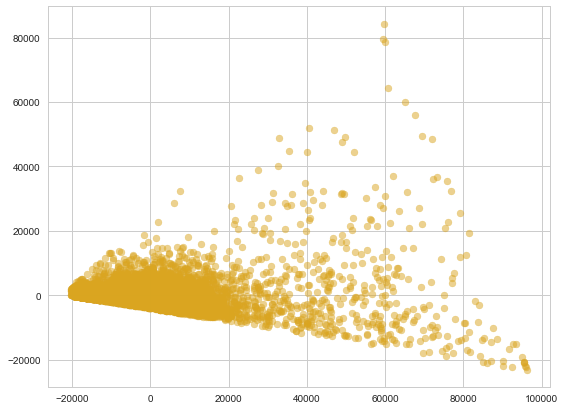

In [383]:
plt.figure(figsize = (9,7))
plt.scatter(x_9d[:,0],x_9d[:,1], c='goldenrod',alpha=0.5)
# plt.ylim(-10,30)
plt.show()

# 3.

## Correlation between other factors

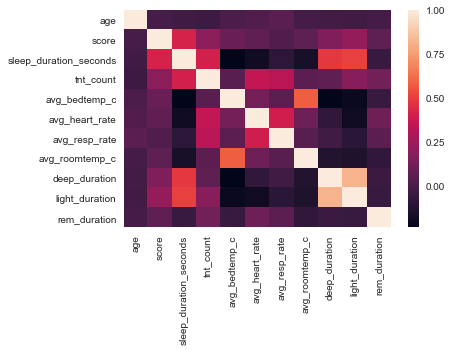

In [330]:
import seaborn as sns
%matplotlib inline

# calculating the correlation matrix on 'new_df' dataframe
corr = new_df.corr()

# plotting the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

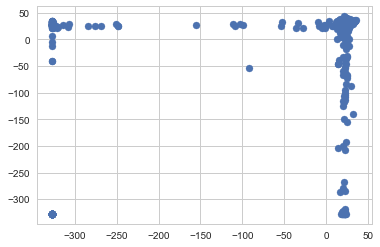

In [335]:
plt.scatter(new_df.avg_roomtemp_c, new_df.avg_bedtemp_c)
plt.show()

In [367]:
df_merge = avnew_df.head(2000).merge(avnew_df.head(2000), on='start_hour')
results = pd.crosstab(df_merge.user_id_x, df_merge.user_id_y)
np.fill_diagonal(results.values, 0)
# results

In [369]:
results.head()

user_id_y,0077491172ef4960805764ae298682dc,0077ada55954408b8d62aeabc9b3f7cf,00f909a213b048b588a4896ab29cea28,00fded67af2e4b3998a0c590103c5ae3,01215a75b9fa4884a8afc8646cbb194a,013ea5d47aae4203beebb885c852314b,0142a1e1deba427b99307f6c93f40322,01b28d96baec41eba1e55a8c691c7730,01b2c8f5bb7f4a19a05b45a4d3b3b129,025ba3ce9d1a4464930df31d6c6449cd,...,c08741b7d3c84bd2be94e7fd2d913b44,c0d3bfe15925484887399e123c9c130d,c18648e9a55040f5a73957b28c0fc246,c1c87018ed4d4a72bccbd94c6bc19a99,c1cbef44b33e4c548b9e5b091f118faf,c2c6cba9a48a451d8355989cd2d99c65,c323e7be384d40629c4af7da8ba198fc,c32f9ed17ec54e7f99947f781506d2a0,c3669fe1254a4328aa738a8e155272a5,c4dbf86f5ba049d780907c191d7fa2f1
user_id_x,,,,,,,,,,,,,,,,,,,,,
0077491172ef4960805764ae298682dc,0,0,3,0,0,0,0,6,0,0,...,0,0,0,0,0,3,0,0,0,0
0077ada55954408b8d62aeabc9b3f7cf,0,0,4,1,0,0,0,3,0,1,...,0,5,5,0,0,1,0,2,1,0
00f909a213b048b588a4896ab29cea28,3,4,0,2,0,0,0,2,0,4,...,0,20,20,0,0,5,0,8,4,0
00fded67af2e4b3998a0c590103c5ae3,0,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01215a75b9fa4884a8afc8646cbb194a,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2


In [361]:
G=nx.from_pandas_dataframe(avnew_df,'user_id','user_id','start_hour')

Adjtraining = nx.adjacency_matrix(G)

print Adjtraining.todense()

SyntaxError: invalid syntax (<ipython-input-361-d98781a6ff10>, line 5)

In [372]:
import igraph



ModuleNotFoundError: No module named 'igraph'

In [ ]:
A = avnew_df.head(2000).values

# Create graph, A.astype(bool).tolist() or (A / A).tolist() can also be used.
g = igraph.Graph.Adjacency((A > 0).tolist())